In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# Parameters
nx = 41
ny = 41
xmin = 0
xmax = 1
ymin = -0.5
ymax = 0.5

l2_target = 2e-7

In [3]:
def poisson_IG(nx, ny, xmax, xmin, ymax, ymin):
    '''Initialize the Poisson problem initial guess and other variables
    Parameters:
    ----------
    nx : int
        number of mesh points in x
    ny : int
        number of mesh points in y
    xmax: float
        maximum value of x in mesh
    xmin: float
        minimum value of x in mesh
    ymax: float
        maximum value of y in mesh
    ymin: float
        minimum value of y in mesh
    
    Returns:
    -------
    X  : 2D array of floats
        X-position of mesh
    Y  : 2D array of floats
        Y-position of mesh
    p_i: 2D array of floats
        initial guess of p
    b  : 2D array of floats
        forcing function
    dx : float
        mesh size in x direction
    dy : float
        mesh size in y direction
    '''

    dx = (xmax-xmin)/(nx-1)
    dy = (ymax-ymin)/(ny-1)

    # Mesh
    x  = numpy.linspace(xmin,xmax,nx)
    y  = numpy.linspace(ymin,ymax,ny)
    X,Y = numpy.meshgrid(x,y)

    # Source
    L = xmax-xmin
    b = -2*(pi/L)**2*numpy.sin(pi*X/L)*numpy.cos(pi*Y/L)

    # Initialize
    p_i  = numpy.zeros((ny,nx))

    return X, Y, x, y, p_i, b, dx, dy, L

In [4]:
from laplace_helper import L2_rel_error

In [5]:
def poisson_2d(p, b, dx, dy, l2_target):
    '''Performs Jacobi relaxation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l2_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''

    l2_norm = 1
    iterations = 0
    l2_conv = []
    
    while l2_norm > l2_target:

        pd = p.copy()

        p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((pd[1:-1,2:]+pd[1:-1,:-2])*dy**2 +\
                        (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 -\
                         b[1:-1,1:-1]*dx**2*dy**2)
    
        # BCs are automatically enforced
        
        l2_norm = L2_rel_error(pd,p)
        iterations += 1
        l2_conv.append(l2_norm)
    
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return p, l2_conv  

In [6]:
from laplace_helper import plot_3D

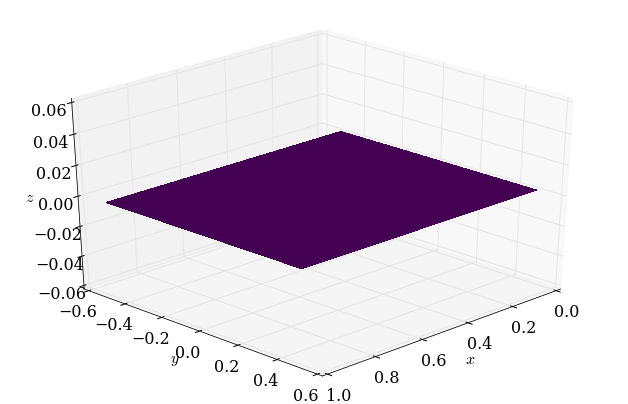

In [7]:
X, Y, x, y, p_i, b, dx, dy, L = poisson_IG(nx, ny, xmax, xmin, ymax, ymin)
plot_3D(x, y, p_i)